In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
sns.set_style('darkgrid')

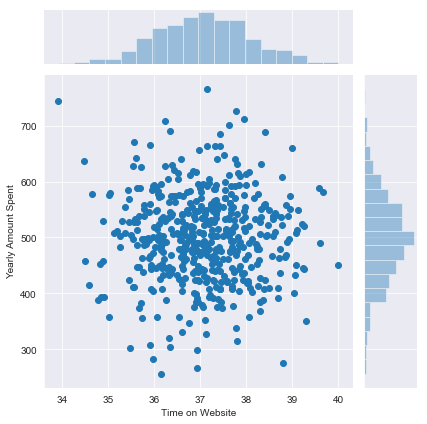

In [7]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df);

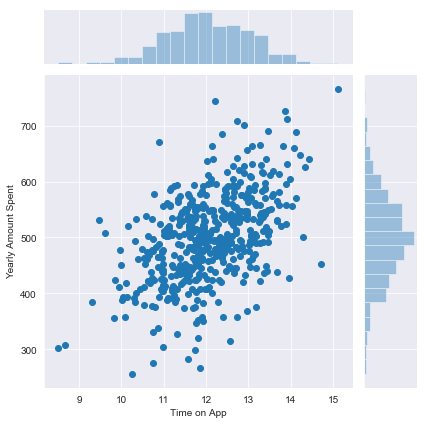

In [8]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df);

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


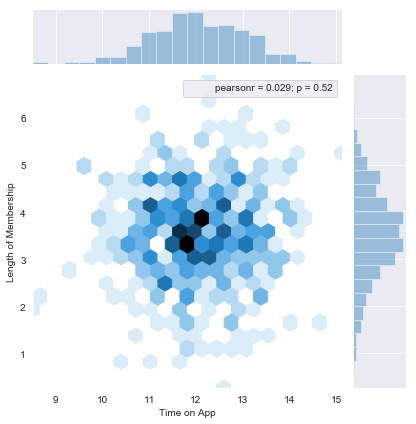

In [10]:
from scipy import stats
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex',  stat_func = stats.pearsonr);

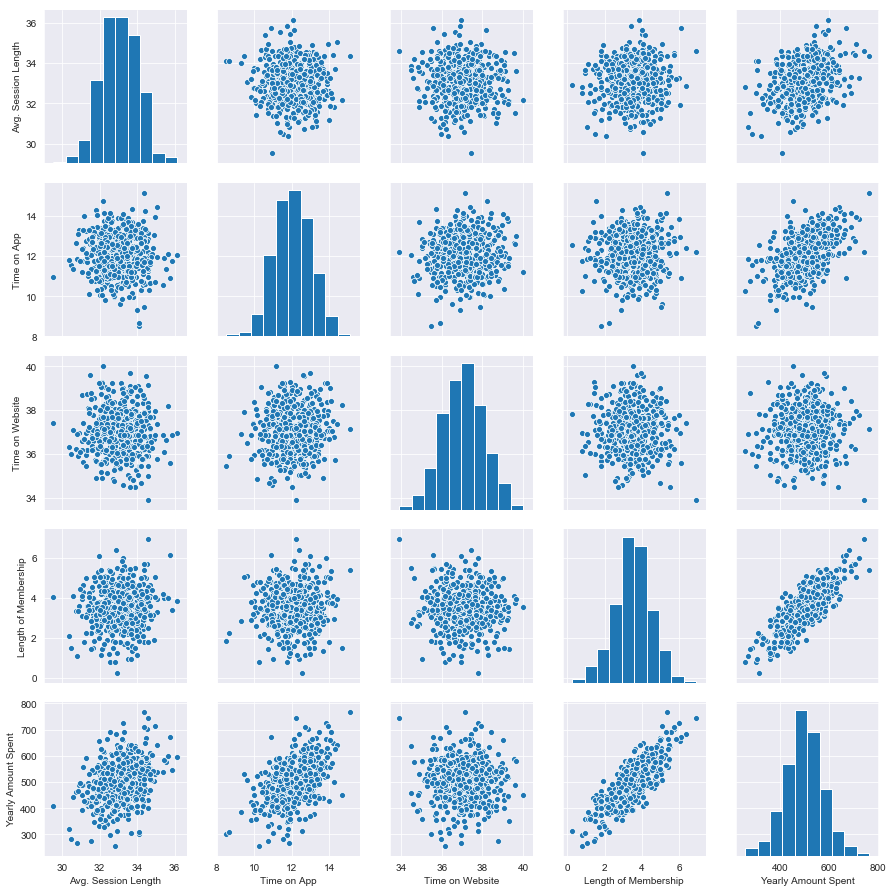

In [9]:
sns.pairplot(df);

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


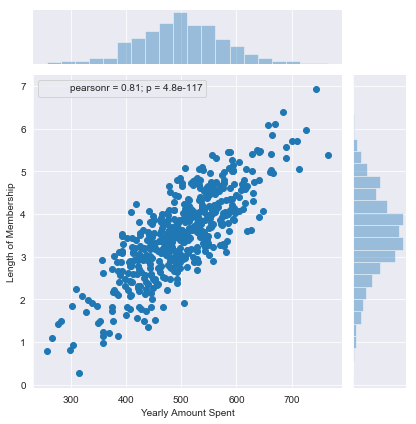

In [13]:
from scipy import stats
sns.jointplot(x='Yearly Amount Spent', y='Length of Membership', data=df, kind='scatter',  stat_func = stats.pearsonr);

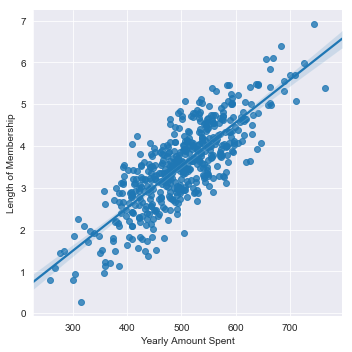

In [17]:
sns.lmplot(x='Yearly Amount Spent',  y='Length of Membership', data=df)

In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Training and Testing Data

## Create Test and Train data with only the numeric values of the dataset 

In [4]:
#Define the X TRAIN & TEST data
#Since Yearly Amount Spent will be the y (= prediction variable) we will leave this out of the X TRAIN/TEST data
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [5]:
#Now we will Define the prediction variable y (this is Yearly Amount Spent, since we want to predict the Yearly Amount Spent)
y = df['Yearly Amount Spent']

## Split the TEST and TRAIN Data 

In [6]:
#From sklearn we will now import the TEST, TRAIN & SPLIT method
from sklearn.model_selection import train_test_split

In [7]:
#We will now split the data with a test size of 40% (normally between 30%-40%) and a randomness of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training of the Model

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Model Evaluation

In [12]:
# print the intercept
print(lm.intercept_)

-1045.1152168245742


In [13]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


# Predictions from our Model

In [14]:
predictions = lm.predict(X_test)

# # Analyse the quality of the model

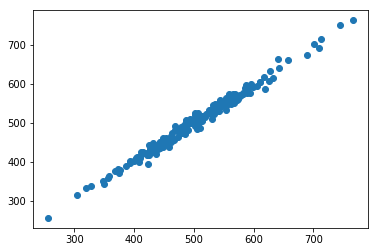

In [15]:
plt.scatter(y_test,predictions)

Because the scatterplot shows a very good fit of predicted values against the test value the choice for the
Linear Regression model was a good one. 
Next we will mak a histogram of the residuals (predicted value - test value). If this is normal distributed it is
another sign that the model is good

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


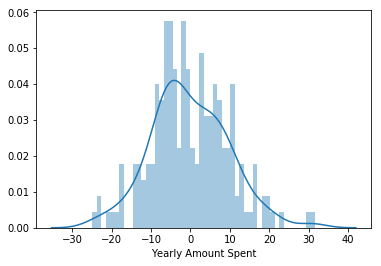

In [16]:
sns.distplot((y_test-predictions),bins=50);

### Analyze the Mean Errors (Mean Absolute Error MAE, SME Squared Mean Error and RMSE)

In [18]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.742671285838735
MSE: 93.83297800820081
RMSE: 9.686742383701592


# Conclusion

If we look at the coefficients it becomes clear that Membership lenght contributes the most to the Yearly Amount Spent by a customer. Further time on App has a far greater impact on the Yearly Amount Spent thant time on Website. So focussing on the App should be better than focussing on the Website